# Econ 1923 - CPI project
### Group #4: Georgia Wright, Jingyuan Liu, Rujian Zhang

In [1]:
import requests
import json
import pandas as pd

In [2]:
%run APIkeys.py
key = os.environ['BLS_API_key']

API keys loaded


## 2.1 Items and Weights
Your basket must include at least 8 ingredients.
https://download.bls.gov/pub/time.series/cu/cu.item

Student expenses


- SAR     Recreation; 0.4
- SAH     Housing; 0.25
- SAA     Apparel; 0.02
- SAM     Medical care; 0.01
- SEFV    Food away from home; 0.15
- SAF11   Food at home; 0.1
- SAS4    Transportation services; 0.06


## 2.2 Locations and weights
The locations where these prices are measured. List at least three locations (cities/areas) based on where the team members either live now, lived in the past, or want to live in the future.
2 Choose weights for these locations according to your liking.

- S12B    Philadelphia, PA; weight: 0.5
- S23A	  Chicago, IL; weight: 0.3
- S49D    Seattle, WA; weight: 0.2

For items that did not exist in Philadelphia and Chicago we used Northeast and Midwest respectively 

## 2.3 Finalizing the basket
Combining the choices of items and locations, find all the series names. assign a weight for each series that combines the weights that you chose for the items and the weights you chose for the locations.


**Finalized basket:**
- CUURS23ASAR;       Recreation in Chicago; weight **0.22**
- CUUR0200SAH;       Housing in Chicago; weight **0.17**
- CUURS12BSAA;       Apparel in the Northeast; weight **0.16**
- CUUR0100SAM;       Medicine Philadelphia; weight **0.04**
- CUURS49DSEFV       Food away in NE; weight **0.11**
- CUURS49DSAF111;    Food home in Seattle; weight **0.09**
- CUURS23ASAR;       Recreation in Philadelphia; weight **0.13**
- CUUR0200SAS4;      Public Transportation in Philadelphia; weight **0.08**

## 3. Downloading the data 
### 3.1 Refine the basket
First, verify that the series you created in the previous section exist in the BLS’ API. If some items do not exist, take them out and re-weight. If a certain location produces all the missing series, replace that location with a bigger or more general location.3
After you made all the changes and adjustments, state the final basket and the weights for each item in the basket. Table format will be great here.

In [3]:
# what items exist for philadelphia: all except public transportation
basket2 = ['CUURS12BSAR', 'CUURS12BSAH', 'CUURS12BSAA', 'CUURS12BSAM', 'CUURS12BSEFV', 'CUURS12BSAF11', 
          'CUURS12BSAF114', 'CUURS12BSAS4']

In [4]:
# what items exist for Northeast: all
basket3  = ['CUUR0100SAR', 'CUUR0100SAH', 'CUUR0100SAA', 'CUUR0100SAM', 'CUUR0100SEFV', 'CUUR0100SAF11', 
          'CUUR0100SAF114', 'CUUR0100SAS4']

In [5]:
# what items exist for Chicago: all except transportation
basket4 = ['CUURS23ASAR', 'CUURS23ASAH', 'CUURS23ASAA', 'CUURS23ASAM', 'CUURS23ASEFV', 'CUURS23ASAF11', 
          'CUURS23ASAF114', 'CUURS23ASAS4']

In [6]:
# what items exist for midwest: all
basket5 = ['CUUR0200SAR', 'CUUR0200SAH', 'CUUR0200SAA', 'CUUR0200SAM', 'CUUR0200SEFV', 'CUUR0200SAF11', 
          'CUUR0200SAF114', 'CUUR0200SAS4']

In [7]:
# what items exist for Seattle: all except transportation
basket6  = ['CUURS49DSAR', 'CUURS49DSAH', 'CUURS49DSAA', 'CUURS49DSAM', 'CUURS49DSEFV', 'CUURS49DSAF11', 
          'CUURS49DSAF114', 'CUURS49DSAS4']

In [51]:
# this chunk contains finalized basket with general cpi included
basket = ['CUURS23ASAR', 'CUURS23ASAH', 'CUURS12BSAA', 'CUURS12BSAM', 'CUURS49DSEFV', 'CUURS49DSAF11', 
          'CUURS12BSAR', 'CUUR0100SAS4', 'CUUR0000SA0']

In [9]:
def Series(varList,myKey):
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
    headers = {'Content-type': 'application/json'}  #This will not changed !

    parameters = {
        "seriesid":varList,
        "startyear":"2012", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #this converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    for i in range(n):
        if json_data['Results']['series'][i]['data'] == []:
            print('Series ',varList[i],' does not exist')
        else:
            print('Series ',varList[i],' exists')
    
    return json_data

In [52]:
# we tested each of the above baskets to see which of our selected items exist for each area
result = Series(basket,key)

Series  CUURS23ASAR  exists
Series  CUURS23ASAH  exists
Series  CUURS12BSAA  exists
Series  CUURS12BSAM  exists
Series  CUURS49DSEFV  exists
Series  CUURS49DSAF11  exists
Series  CUURS12BSAR  exists
Series  CUUR0100SAS4  exists
Series  CUUR0000SA0  exists


### 3.2 Downloading
Make an API call to download the data for the basket you created. I ask that you have data for the last 5 years: January 2017 to January 2022. Make sure your API call retrieves data for this range.
Include the general CPI (CUUR0000SA0) in your API call.
Question: Are all the series you downloaded in a monthly frequency? If not, how can you fix that (i.e. interpolate).

In [11]:
#create data frame with all of our data
def Series2(varList,myKey):
    # Input: varList = a list of strings containing the series names
    # Input: myKey =  a string containing your BLS API key
    # Output: new_df = a data frame containing the data collected
    
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  
    headers = {'Content-type': 'application/json'}  

    parameters = {
        "seriesid":varList,
        "startyear":"2017", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) # converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    new_df = pd.DataFrame(columns=['year', 'period'])
    for item in range(n):
        l = len(json_data['Results']['series'][item]['data']) #length of the list
        if l == 0:
            print('Series ',varList[item],' does not exist')
        else:
            
            print('Series ',varList[item],' exists with ',l,' observations')
            d = json_data['Results']['series'][item]['data']
            current_df = pd.DataFrame(data=d)
            current_df = current_df[['year','period','value']].astype({'value': 'float64'})
            current_df = current_df.rename(columns = {'value':varList[item]}) 
            
            new_df = new_df.merge(current_df, on = ['year','period'],how='outer')
    
    return new_df


In [53]:
# call our items to put into data frame
myBasket = ['CUURS23ASAR', 'CUURS23ASAH', 'CUURS12BSAA', 'CUURS12BSAM', 'CUURS49DSEFV', 'CUURS49DSAF11', 
          'CUURS12BSAR', 'CUUR0100SAS4', 'CUUR0000SA0']
myData = Series2(myBasket,key)

Series  CUURS23ASAR  exists with  69  observations
Series  CUURS23ASAH  exists with  69  observations
Series  CUURS12BSAA  exists with  34  observations
Series  CUURS12BSAM  exists with  34  observations
Series  CUURS49DSEFV  exists with  34  observations
Series  CUURS49DSAF11  exists with  69  observations
Series  CUURS12BSAR  exists with  34  observations
Series  CUUR0100SAS4  exists with  69  observations
Series  CUUR0000SA0  exists with  69  observations


In [54]:
myData 
# interpolate CUURS12BSAA, CUURS12BSAM, CUURS49DSEFV, and CUURS12BSAR

,year,period,CUURS23ASAR,CUURS23ASAH,CUURS12BSAA,CUURS12BSAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0100SAS4,CUUR0000SA0
0,2022,M09,124.488,296.184,NaN,NaN,NaN,315.815,NaN,330.030,296.808
1,2022,M08,123.405,295.010,112.289,599.558,391.714,317.676,131.309,322.957,296.171
2,2022,M07,120.838,293.135,NaN,NaN,NaN,317.686,NaN,322.235,296.276
3,2022,M06,120.646,291.346,108.908,596.423,377.700,311.685,132.941,327.757,296.311
4,2022,M05,120.756,286.126,NaN,NaN,NaN,310.451,NaN,313.308,292.296
...,...,...,...,...,...,...,...,...,...,...,...
64,2017,M05,111.163,241.575,NaN,NaN,NaN,249.725,NaN,288.119,244.733
65,2017,M04,113.185,240.022,113.182,507.716,296.316,248.565,123.055,286.502,244.524
66,2017,M03,113.501,239.698,NaN,NaN,NaN,249.135,NaN,284.340,243.801
67,2017,M02,111.345,240.382,114.340,508.405,294.503,247.070,124.295,284.875,243.603


In [14]:
# check data types to make sure we can use values in calculations
myData.dtypes

year              object
period            object
CUURS23ASAR      float64
CUUR0200SAH      float64
CUURS12BSAA      float64
CUUR0100SAM      float64
CUURS49DSEFV     float64
CUURS49DSAF11    float64
CUURS12BSAR      float64
CUUR0100SAS4     float64
CUUR0000SA0      float64
dtype: object

## 4. Aggregating
Compute your version of the CPI based on the weights in 2.3.

 CPI = 0.22(CUURS23ASAR) + 0.17(CUUR0200SAH) + 0.16(CUURS12BSAA) + 0.04(CUUR0100SAM) + 0.11(CUURS49DSEFV) + 0.09(CUURS49DSAF111) + 0.13(CUURS12BSAR) + 0.08(CUUR0100SAS4)


In [15]:
# interpolating for CUURS12BSAA, CUURS12BSAM, CUURS49DSEFV, and CUURS12BSAR
def bimonthly2monthly(myData, ser):
    # This function take a column named ser in the data frame myData and change it from bi monthly to monthly by interpolating the data
    # NOTE: This function assumes that myData is sorted from the latest month (position zero) to the oldest month
    #  before using this function, it will be safe to run the command:  myData.sort_values(by=['year','period'],inplace=True,ascending=False)
    
    n = len (myData[ser]) # number of rows

    #first ignore the cases where either the first or the last observations are missing
    # we start by looping over the indeces from 1 (which is the second place in Python)
    # upto (but not including) the last observation ()

    for i in range(1,n-1):
        if pd.isna(myData[ser].iat[i]): #the value in place i is NaN
            myData[ser].iat[i] = math.sqrt(myData[ser].iat[i-1]*myData[ser].iat[i+1]) #replace NaN with a geometric avg of i-1 and i+1

        # after the above stage all the middle observations are full. Now we can treat the first and last one

    if pd.isna(myData[ser].iat[0]): #the value in the first place is NaN
            myData[ser].iat[0] = myData[ser].iat[1]*(myData[ser].iat[1]/myData[ser].iat[2]) #assume the same growth rate from 2 to 1 to be from 1 to 0

    if pd.isna(myData[ser].iat[n-1]): #the value in the last place is NaN
            myData[ser].iat[n-1] = myData[ser].iat[n-2]*(myData[ser].iat[n-2]/myData[ser].iat[n-3]) #assume the same growth rate from n-2 to n-3 to be n-2 to n-1

    return myData
  
  # Usage (after you created your dataframe using multiSeriesV4() ):

  # First, sort the dataframe using:  
  #              df.sort_values(by=['year','period'],inplace=True,ascending=False)
  # (replace df with the name you used for your data frame)

  # Second, use this function:
  #              df = bimonthly2monthly(df,'CUURS12BSAR')
  # (replace df with the name you used for your data frame and replace 'CUURS12BSAR' with a series name you used)
  # The function works on one series on a time (but you could put it in a loop.

In [16]:
import math

In [55]:
# interpolate CUURS12BSAA
df = bimonthly2monthly(myData,'CUURS12BSAA')

In [56]:
# interpolate CUURS12BSAM
df = bimonthly2monthly(myData,'CUURS12BSAM')

In [57]:
# interpolate CUURS49DSEFV
df2 = bimonthly2monthly(myData,'CUURS49DSEFV')

In [58]:
# interpolate CUURS12BSAR
df3 = bimonthly2monthly(myData,'CUURS12BSAR')

In [59]:
# final table
myData

,year,period,CUURS23ASAR,CUURS23ASAH,CUURS12BSAA,CUURS12BSAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0100SAS4,CUUR0000SA0
0,2022,M09,124.488,296.184,114.018659,601.131674,398.914799,315.815,130.500528,330.030,296.808
1,2022,M08,123.405,295.010,112.289000,599.558000,391.714000,317.676,131.309000,322.957,296.171
2,2022,M07,120.838,293.135,110.585580,597.988446,384.643182,317.686,132.122480,322.235,296.276
3,2022,M06,120.646,291.346,108.908000,596.423000,377.700000,311.685,132.941000,327.757,296.311
4,2022,M05,120.756,286.126,108.674750,594.469300,374.938404,310.451,132.083233,313.308,292.296
...,...,...,...,...,...,...,...,...,...,...,...
64,2017,M05,111.163,241.575,111.730695,508.752941,296.533420,249.725,122.971472,288.119,244.733
65,2017,M04,113.185,240.022,113.182000,507.716000,296.316000,248.565,123.055000,286.502,244.524
66,2017,M03,113.501,239.698,113.759527,508.060383,295.408109,249.135,123.673446,284.340,243.801
67,2017,M02,111.345,240.382,114.340000,508.405000,294.503000,247.070,124.295000,284.875,243.603


In [60]:
# Computing our CPI
myData["myCPI"] = 0.22*myData['CUURS23ASAR'] + 0.17*myData['CUURS23ASAH'] + 0.16*myData['CUURS12BSAA'] + 0.04*myData['CUURS12BSAM'] + 0.11*myData['CUURS49DSEFV'] + 0.09*myData['CUURS49DSAF11'] + 0.13*myData['CUURS12BSAR'] + 0.08*myData['CUUR0100SAS4']

In [61]:
# final table with myCPI calculated
myData

,year,period,CUURS23ASAR,CUURS23ASAH,CUURS12BSAA,CUURS12BSAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0100SAS4,CUUR0000SA0,myCPI
0,2022,M09,124.488,296.184,114.018659,601.131674,398.914799,315.815,130.500528,330.030,296.808,235.698339
1,2022,M08,123.405,295.010,112.289000,599.558000,391.714000,317.676,131.309000,322.957,296.171,233.835470
2,2022,M07,120.838,293.135,110.585580,597.988446,384.643182,317.686,132.122480,322.235,296.276,231.887753
3,2022,M06,120.646,291.346,108.908000,596.423000,377.700000,311.685,132.941000,327.757,296.311,230.454680
4,2022,M05,120.756,286.126,108.674750,594.469300,374.938404,310.451,132.083233,313.308,292.296,227.793747
...,...,...,...,...,...,...,...,...,...,...,...,...
64,2017,M05,111.163,241.575,111.730695,508.752941,296.533420,249.725,122.971472,288.119,244.733,197.880376
65,2017,M04,113.185,240.022,113.182000,507.716000,296.316000,248.565,123.055000,286.502,244.524,198.005120
66,2017,M03,113.501,239.698,113.759527,508.060383,295.408109,249.135,123.673446,284.340,243.801,197.984610
67,2017,M02,111.345,240.382,114.340000,508.405000,294.503000,247.070,124.295000,284.875,243.603,197.571420


## 5. Inflation
Compute the 12-month inflation for several lags based on your CPI and compare it with inflation based on the general CPI. Compare and discuss the results.


In [62]:
myData['myCPI']

0     235.698339
1     233.835470
2     231.887753
3     230.454680
4     227.793747
         ...    
64    197.880376
65    198.005120
66    197.984610
67    197.571420
68    196.122135
Name: myCPI, Length: 69, dtype: float64

In [63]:
nrows, cols = myData.shape

In [64]:
mycpi = df["myCPI"]

In [65]:
# calculating inflation for our CPI
def myinflation(lag):
    # This function computes the percent change in the level of myCPI (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = mycpi[lag]
    old = mycpi[12+lag]
    
    change = (new/old - 1)*100
    
    return change

In [66]:
# create variable for number of months that will change as more data gets added to BLS database
obs = nrows - 12 
print(f"there are {obs} months in our inflation data")

there are 57 months in our inflation data


In [67]:
myInflation = list(map(myinflation,range(obs)))
myInflation.reverse()

In [68]:
# reverse lags so most recent months are last
lags = list(range(obs))
lags.reverse()
lags = list(map(str,lags))

In [69]:
#lags

In [70]:

#inflation3 = []
#for i in range(nrows-1):
    
    #x = myData.myCPI.iloc[i] / myData.myCPI.iloc[i+1]
    #inflation3.append((x-1)*100)


In [71]:
#inflation3

In [72]:
#len(inflation3)

In [73]:
b4 = ['CUUR0000SA0']

In [74]:
result4 = Series(b4,key)

Series  CUUR0000SA0  exists


In [75]:
# now calculate inflation for general CPI
def inflation2(lag):
    # This function computes the percent change in the level of prices (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = float(result4['Results']['series'][0]['data'][lag]['value'])
    old = float(result4['Results']['series'][0]['data'][12+lag]['value'])
    
    change = (new/old - 1)*100
    print('Inflation in the period starting ', lag, 'months ago and ending', 12+lag, 'months ago was ',round(change,1),'%')
    return change

In [76]:
lags =[]
changes = []
for i in range(obs):
    lags.append(i)
    changes.append(inflation2(i))


Inflation in the period starting  0 months ago and ending 12 months ago was  8.2 %
Inflation in the period starting  1 months ago and ending 13 months ago was  8.3 %
Inflation in the period starting  2 months ago and ending 14 months ago was  8.5 %
Inflation in the period starting  3 months ago and ending 15 months ago was  9.1 %
Inflation in the period starting  4 months ago and ending 16 months ago was  8.6 %
Inflation in the period starting  5 months ago and ending 17 months ago was  8.3 %
Inflation in the period starting  6 months ago and ending 18 months ago was  8.5 %
Inflation in the period starting  7 months ago and ending 19 months ago was  7.9 %
Inflation in the period starting  8 months ago and ending 20 months ago was  7.5 %
Inflation in the period starting  9 months ago and ending 21 months ago was  7.0 %
Inflation in the period starting  10 months ago and ending 22 months ago was  6.8 %
Inflation in the period starting  11 months ago and ending 23 months ago was  6.2 %
In

In [77]:
#lags

In [78]:
#changes

In [79]:
def int2str(i):
    return str(i)

mlags = map(int2str,lags)

In [80]:
mlags

In [81]:
slags = list(mlags)

In [82]:
slags.reverse()

In [83]:
#slags

In [84]:
changes.reverse()

## Comparison between our CPI inflation rates and general CPI inflation rates
- Our inflation rates are consistently lower than the inflation rates of the general CPI.
- This differences can be attributed to the selection of items we chose.
- The prices of the items we chose to include in our basket did not change significantly in price over the five year period.

### Bonus: Put both on one graph and make sure the two lines are clearly labeled as well as the axes.

In [85]:
from matplotlib import pyplot as plt

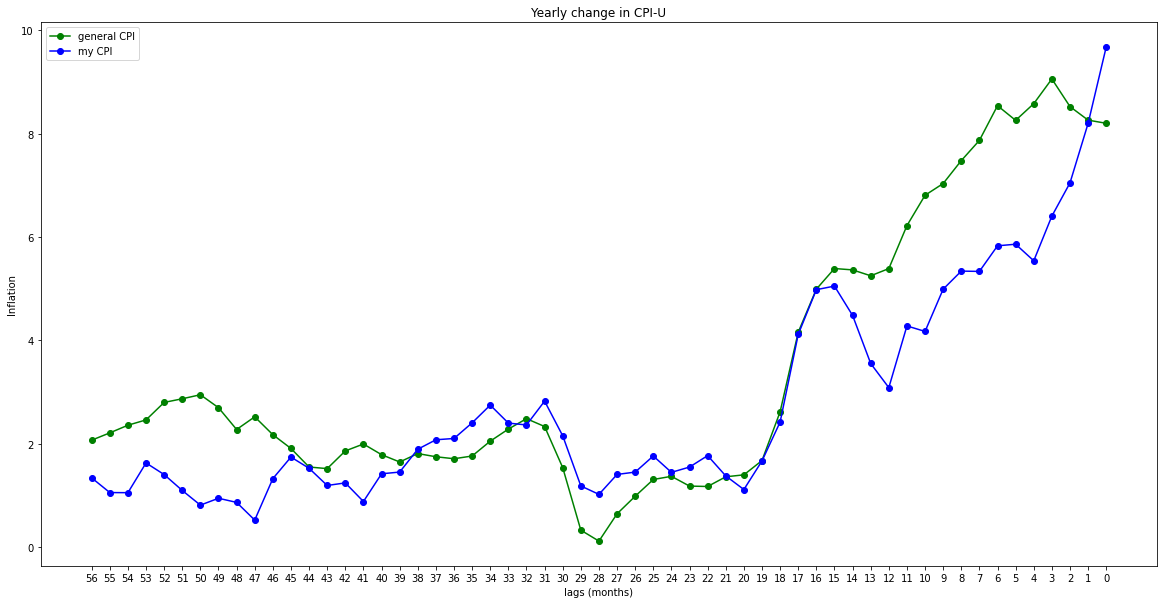

In [86]:
plt.figure(figsize = (20,10))

plt.plot(slags, changes, color='green', marker='o', linestyle='solid', label= "general CPI")
plt.plot(lags,myInflation, color='blue', marker='o', linestyle='solid', label = "my CPI")
plt.title("Yearly change in CPI-U")
plt.xlabel("lags (months)")
plt.ylabel("Inflation")
plt.legend()
plt.show()